Notebook to check the DR9SV imaging

In [1]:
import os 
import glob
import h5py
import fitsio
import numpy as np 
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
# local directory with data
dat_dir = '/Users/ChangHoon/data/feasiBGS/survey_validation/'

Read in DR9SV imaging

In [3]:
dr9sv = fitsio.read(os.path.join(dat_dir, 'sv1-targets-dr9-hp-X.fits'))

currently specified regions

In [4]:
sv_regions = {}
sv_regions['01_s82']            = '30,40,-7,2'
sv_regions['02_egs']            = '210,220,50,55'
sv_regions['03_gama09']         = '129,141,-2,3'
sv_regions['04_gama12']         = '175,185,-3,2'
sv_regions['05_gama15']         = '212,222,-2,3'
sv_regions['06_overlap']        = '135,160,30,35'
sv_regions['07_refnorth']       = '215,230,41,46'
sv_regions['08_ages']           = '215,220,30,40'
sv_regions['09_sagittarius']    = '200,210,5,10'
sv_regions['10_highebv_n']      = '140,150,65,70'
sv_regions['11_highebv_s']      = '240,245,20,25'
sv_regions['12_highstardens_n'] = '273,283,40,45'
sv_regions['13_highstardens_s'] = '260,270,15,20'

(-40, 90)

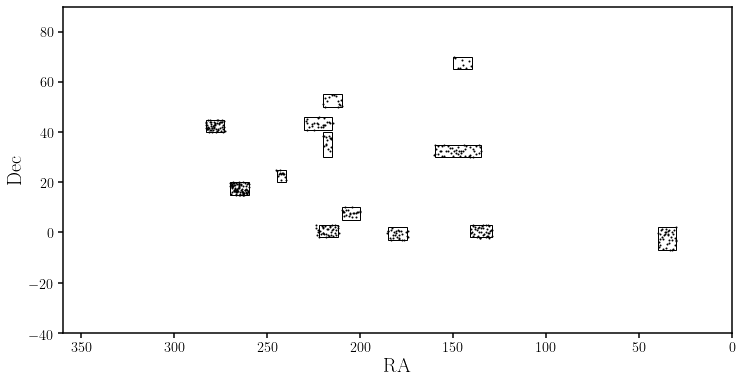

In [5]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(111)

sub.scatter(dr9sv['RA'][::10000], dr9sv['DEC'][::10000], c='k', s=1)
for i, reg in enumerate(sv_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=1, edgecolor='k', facecolor='none')
    sub.add_patch(region) 

sub.set_xlabel('RA', fontsize=20)
sub.set_xlim(360, 0)
sub.set_ylabel('Dec', fontsize=20)
sub.set_ylim(-40, 90)

regions we want *outside* of DR9SV imaging

In [6]:
omitted_regions = {} 
omitted_regions['PRIMUS-COSMOS'] = '149.6,150.7,1.8,2.9'
omitted_regions['PRIMUS-CDFS-SWIRE'] = '51.8,54.4,-29.7,-28.0'

(-40, 90)

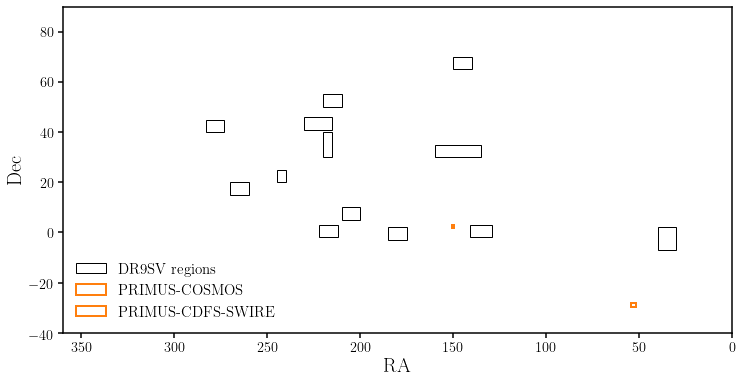

In [7]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(111)

for i, reg in enumerate(sv_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=1, edgecolor='k', facecolor='none')
    sub.add_patch(region) 

region = patches.Rectangle((0,0),0,0, linewidth=1, edgecolor='k', facecolor='none', label='DR9SV regions')
sub.add_patch(region) 

for i, reg in enumerate(omitted_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(omitted_regions[reg].split(',')[0]), float(omitted_regions[reg].split(',')[1])
    dec_min, dec_max    = float(omitted_regions[reg].split(',')[2]), float(omitted_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=2, edgecolor='C1', facecolor='none', label=reg)
    sub.add_patch(region) 
    
sub.legend(loc='lower left', fontsize=15)
sub.set_xlabel('RA', fontsize=20)
sub.set_xlim(360, 0)
sub.set_ylabel('Dec', fontsize=20)
sub.set_ylim(-40, 90)

Lets compare the DR9 SV footprint to the old BGS SV fields

In [8]:
sv_old = fitsio.read(os.path.join(dat_dir, 'BGS_SV_30_3x_superset60_Sep2019.fits')) 

(-40, 90)

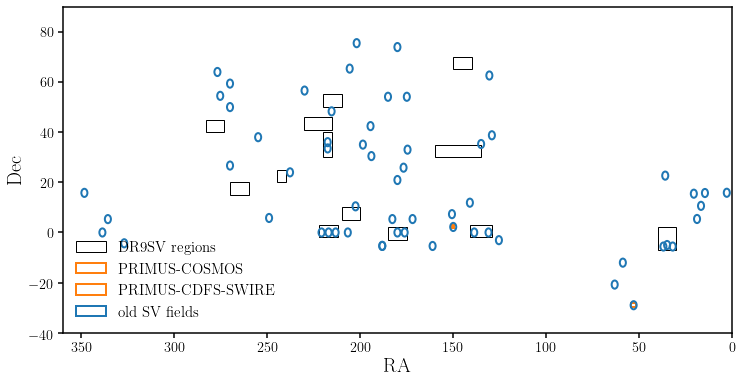

In [9]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(111)

for i, reg in enumerate(sv_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=1, edgecolor='k', facecolor='none')
    sub.add_patch(region) 

region = patches.Rectangle((0,0),0,0, linewidth=1, edgecolor='k', facecolor='none', label='DR9SV regions')
sub.add_patch(region) 

for i, reg in enumerate(omitted_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(omitted_regions[reg].split(',')[0]), float(omitted_regions[reg].split(',')[1])
    dec_min, dec_max    = float(omitted_regions[reg].split(',')[2]), float(omitted_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=2, edgecolor='C1', facecolor='none', label=reg)
    sub.add_patch(region) 

for i in range(len(sv_old['RA'])): 
    circ = patches.Circle((sv_old['RA'][i], sv_old['DEC'][i]), 
                          radius=1.6275, edgecolor='C0', facecolor='none', linewidth=2) 
    sub.add_patch(circ) 
circ = patches.Circle((0, 0), radius=0, edgecolor='C0', facecolor='none', linewidth=2, label='old SV fields') 
sub.add_patch(circ) 
        
sub.legend(loc='lower left', fontsize=15)
sub.set_xlabel('RA', fontsize=20)
sub.set_xlim(360, 0)
sub.set_ylabel('Dec', fontsize=20)
sub.set_ylim(-40, 90)

Overall there's very little overlap with the DR9 SV fields. First lets keep all the old tiles that are in the SV regions and the PRIMUS regions

In [10]:
# keep fields that already fall into regions 
print('out of %i fields' % len(sv_old['RA']))
keep = np.zeros(len(sv_old['RA'])).astype(bool) 
for reg in sv_regions.keys(): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])
    inkeep = (
            (sv_old['RA'] > ra_min) & (sv_old['RA'] < ra_max) & 
            (sv_old['DEC'] > dec_min) & (sv_old['DEC'] < dec_max)
            )    
    keep = keep | inkeep
print('keeping %i previous fields in DR9SV regions' % np.sum(keep))

for reg in omitted_regions.keys(): 
    ra_min, ra_max      = float(omitted_regions[reg].split(',')[0]), float(omitted_regions[reg].split(',')[1])
    dec_min, dec_max    = float(omitted_regions[reg].split(',')[2]), float(omitted_regions[reg].split(',')[3])
    inkeep = (
            (sv_old['RA'] > ra_min) & (sv_old['RA'] < ra_max) & 
            (sv_old['DEC'] > dec_min) & (sv_old['DEC'] < dec_max)
            ) 
    keep = keep | inkeep 
print('keeping %i previous fields including omitted regions' % np.sum(keep))

out of 60 fields
keeping 12 previous fields in DR9SV regions
keeping 14 previous fields including omitted regions


(-40, 90)

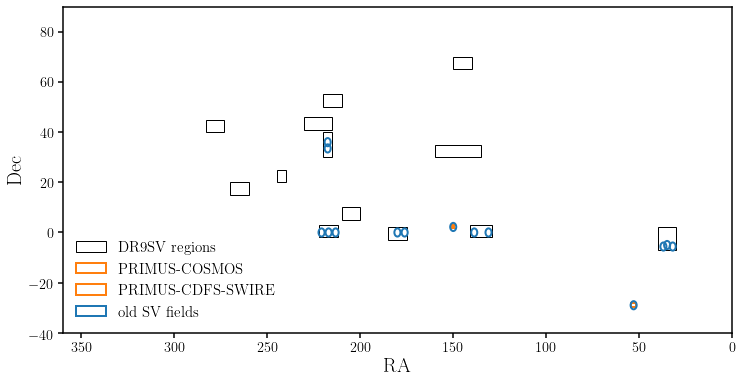

In [11]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(111)

for i, reg in enumerate(sv_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=1, edgecolor='k', facecolor='none')
    sub.add_patch(region) 

region = patches.Rectangle((0,0),0,0, linewidth=1, edgecolor='k', facecolor='none', label='DR9SV regions')
sub.add_patch(region) 

for i, reg in enumerate(omitted_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(omitted_regions[reg].split(',')[0]), float(omitted_regions[reg].split(',')[1])
    dec_min, dec_max    = float(omitted_regions[reg].split(',')[2]), float(omitted_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=2, edgecolor='C1', facecolor='none', label=reg)
    sub.add_patch(region) 

for i in np.arange(len(sv_old['RA']))[keep]: 
    circ = patches.Circle((sv_old['RA'][i], sv_old['DEC'][i]), 
                          radius=1.6275, edgecolor='C0', facecolor='none', linewidth=2) 
    sub.add_patch(circ) 
circ = patches.Circle((0, 0), radius=0, edgecolor='C0', facecolor='none', linewidth=2, label='old SV fields') 
sub.add_patch(circ) 
        
sub.legend(loc='lower left', fontsize=15)
sub.set_xlabel('RA', fontsize=20)
sub.set_xlim(360, 0)
sub.set_ylabel('Dec', fontsize=20)
sub.set_ylim(-40, 90)

Now lets put as many new BGS SV tiles in the DR9SV fields

39 new SV fields in DR9SV regions
53 total tiles assigned so far


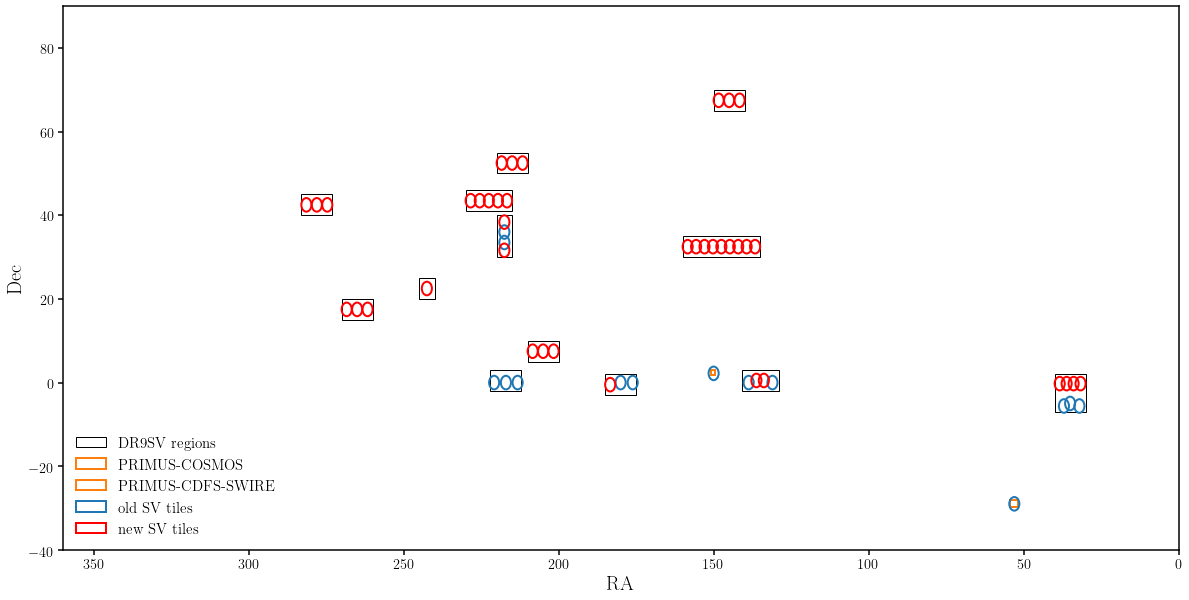

In [17]:
# put SV tiles on high EBV regions and high star density 
ra_new, dec_new = [], [] 
for reg in sv_regions.keys(): 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])

    if reg == '11_highebv_s': 
        ra_new.append([0.5*(ra_min + ra_max)])
        dec_new.append([0.5*(dec_min + dec_max)])
    elif reg == '08_ages': 
        _dec = [dec_min+1.63, dec_max-1.63]
        _ra = [0.5*(ra_min + ra_max) for _ in _dec]
        ra_new.append(_ra)
        dec_new.append(_dec) 
    elif reg == '01_s82':
        i_ra = np.floor(((ra_max - ra_min) - 2. * 1.63) / (1.25*1.63))
        dra = (ra_max - ra_min - 2. * 1.63) / i_ra
        _ra = [ra_min + 1.63 + dra * i for i in range(int(i_ra)+1)]
        _dec = [0.25*dec_min + 0.75*dec_max  for _ in _ra]
        ra_new.append(_ra)
        dec_new.append(_dec) 
    elif reg == '04_gama12': 
        ra_new.append([ra_max - 1.63])
        dec_new.append([0.5*(dec_min + dec_max)])
    elif reg == '03_gama09': 
        ra_new.append([0.5 * (ra_min + ra_max)-1.2, 0.5 * (ra_min + ra_max)+1.2])
        dec_new.append([0.5 * (dec_min + dec_max), 0.5 * (dec_min + dec_max)])
    elif reg == '05_gama15':
        pass
    elif reg == '06_overlap': 
        i_ra = np.floor(((ra_max - ra_min) - 2. * 1.63) / (1.25*1.63)) - 2
        dra = (ra_max - ra_min - 2. * 1.63) / i_ra
        _ra = [ra_min + 1.63 + dra * i for i in range(int(i_ra)+1)]
        ra_new.append(_ra)
        dec_new.append([0.5*(dec_min + dec_max) for _ in _ra]) 
    else: 
        i_ra = np.floor(((ra_max - ra_min) - 2. * 1.63) / (1.25*1.63)) - 1
        dra = (ra_max - ra_min - 2. * 1.63) / i_ra
        _ra = [ra_min + 1.63 + dra * i for i in range(int(i_ra)+1)]
        ra_new.append(_ra)
        dec_new.append([0.5*(dec_min + dec_max) for _ in _ra]) 
        
ra_new = np.concatenate(ra_new)
dec_new = np.concatenate(dec_new)
print('%i new SV fields in DR9SV regions' %  len(ra_new)) 

fig = plt.figure(figsize=(20,10))
sub = fig.add_subplot(111)

for i, reg in enumerate(sv_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=1, edgecolor='k', facecolor='none')
    sub.add_patch(region) 

region = patches.Rectangle((0,0),0,0, linewidth=1, edgecolor='k', facecolor='none', label='DR9SV regions')
sub.add_patch(region) 

for i, reg in enumerate(omitted_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(omitted_regions[reg].split(',')[0]), float(omitted_regions[reg].split(',')[1])
    dec_min, dec_max    = float(omitted_regions[reg].split(',')[2]), float(omitted_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=2, edgecolor='C1', facecolor='none', label=reg)
    sub.add_patch(region) 

for i in np.arange(len(sv_old['RA']))[keep]: 
    circ = patches.Circle((sv_old['RA'][i], sv_old['DEC'][i]), 
                          radius=1.6275, edgecolor='C0', facecolor='none', linewidth=2) 
    sub.add_patch(circ) 
circ = patches.Circle((0, 0), radius=0, edgecolor='C0', facecolor='none', linewidth=2, label='old SV tiles') 
sub.add_patch(circ) 
        
for i in np.arange(len(ra_new)): 
    circ = patches.Circle((ra_new[i], dec_new[i]), radius=1.6275, edgecolor='r', facecolor='none', linewidth=2) 
    sub.add_patch(circ) 
circ = patches.Circle((0, 0), radius=0, edgecolor='r', facecolor='none', linewidth=2, label='new SV tiles') 
sub.add_patch(circ)     
    
sub.legend(loc='lower left', fontsize=15)
sub.set_xlabel('RA', fontsize=20)
sub.set_xlim(360, 0)
sub.set_ylabel('Dec', fontsize=20)
sub.set_ylim(-40, 90)
print('%i total tiles assigned so far' % (np.sum(keep) + len(ra_new)))

In [18]:
np.random.seed(1)
n_left = 60 - (np.sum(keep) + len(ra_new))

In [33]:
# pick the rest of the tiles from desi-tiles.fits far from the selected tiles 
desi_tiles = fitsio.read(os.path.join(dat_dir, 'desi-tiles.fits')) 
    
keeptile = np.ones(desi_tiles.shape[0]).astype(bool)
keeptile &= (desi_tiles['IN_DESI'] == 1) & (desi_tiles['PASS'] == 5)
for ra, dec in zip(ra_new, dec_new): 
    _keep = ((desi_tiles['RA'] - ra)**2 + (desi_tiles['DEC'] - dec)**2 > 400.)
    keeptile = keeptile & _keep
    
for ra, dec in zip(sv_old['RA'][keep], sv_old['DEC'][keep]): 
    _keep = ((desi_tiles['RA'] - ra)**2 + (desi_tiles['DEC'] - dec)**2 > 400.)
    keeptile = keeptile & _keep        
    
ra_random, dec_random, i_tiles = [], [], []
for i in range(n_left): 
    new_pick = np.random.choice(np.arange(np.sum(keeptile)), 1, replace=False) 
    _ra, _dec = desi_tiles['RA'][keeptile][new_pick], desi_tiles['DEC'][keeptile][new_pick]
    ra_random.append(_ra) 
    dec_random.append(_dec)
    i_tiles.append(np.arange(len(desi_tiles['RA']))[keeptile][new_pick])
    keeptile = keeptile & ((desi_tiles['RA'] - _ra)**2 + (desi_tiles['DEC'] - _dec)**2 > 400.)

7 random new fields


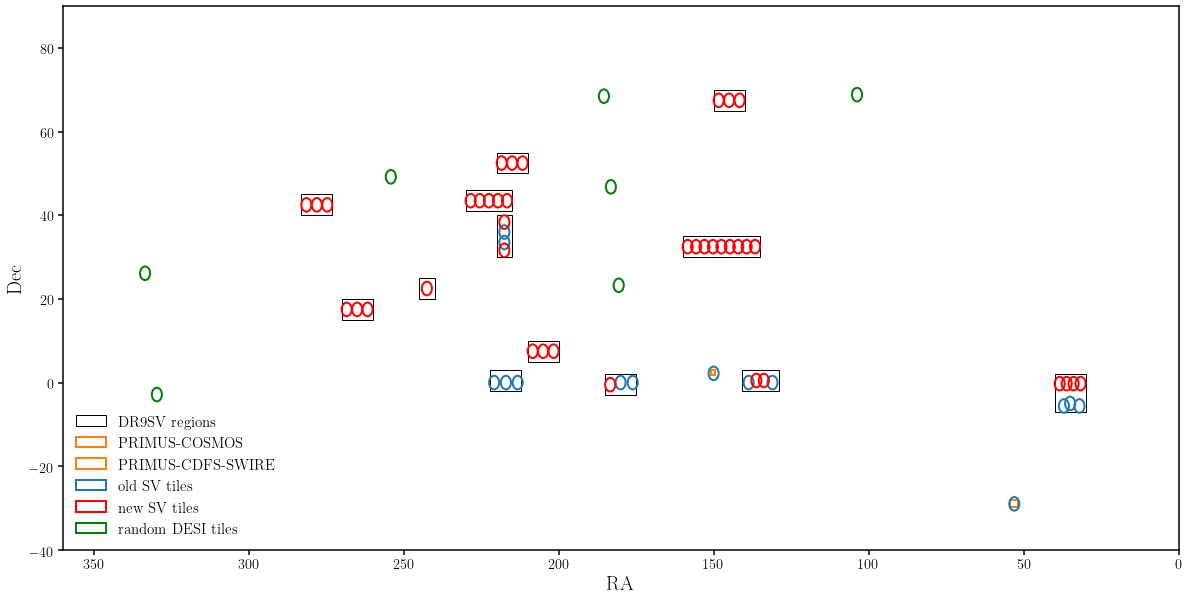

In [32]:
fig = plt.figure(figsize=(20,10))
sub = fig.add_subplot(111)

for i, reg in enumerate(sv_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(sv_regions[reg].split(',')[0]), float(sv_regions[reg].split(',')[1])
    dec_min, dec_max    = float(sv_regions[reg].split(',')[2]), float(sv_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=1, edgecolor='k', facecolor='none')
    sub.add_patch(region) 

region = patches.Rectangle((0,0),0,0, linewidth=1, edgecolor='k', facecolor='none', label='DR9SV regions')
sub.add_patch(region) 

for i, reg in enumerate(omitted_regions.keys()): 
    # get RA, Dec range of new SV regions 
    ra_min, ra_max      = float(omitted_regions[reg].split(',')[0]), float(omitted_regions[reg].split(',')[1])
    dec_min, dec_max    = float(omitted_regions[reg].split(',')[2]), float(omitted_regions[reg].split(',')[3])

    region = patches.Rectangle((ra_min, dec_min), (ra_max - ra_min), (dec_max - dec_min), 
            linewidth=2, edgecolor='C1', facecolor='none', label=reg)
    sub.add_patch(region) 

for i in np.arange(len(sv_old['RA']))[keep]: 
    circ = patches.Circle((sv_old['RA'][i], sv_old['DEC'][i]), 
                          radius=1.6275, edgecolor='C0', facecolor='none', linewidth=2) 
    sub.add_patch(circ) 
circ = patches.Circle((0, 0), radius=0, edgecolor='C0', facecolor='none', linewidth=2, label='old SV tiles') 
sub.add_patch(circ) 
        
for i in np.arange(len(ra_new)): 
    circ = patches.Circle((ra_new[i], dec_new[i]), radius=1.6275, edgecolor='r', facecolor='none', linewidth=2) 
    sub.add_patch(circ) 
circ = patches.Circle((0, 0), radius=0, edgecolor='r', facecolor='none', linewidth=2, label='new SV tiles') 
sub.add_patch(circ)   

for _ra, _dec in zip(ra_random, dec_random): 
    circ = patches.Circle((_ra, _dec), radius=1.6275, edgecolor='g', facecolor='none', linewidth=2) 
    sub.add_patch(circ) 
circ = patches.Circle((0, 0), radius=0, edgecolor='g', facecolor='none', linewidth=2, label='random DESI tiles') 
sub.add_patch(circ) 
        
    
sub.legend(loc='lower left', fontsize=15)
sub.set_xlabel('RA', fontsize=20)
sub.set_xlim(360, 0)
sub.set_ylabel('Dec', fontsize=20)
sub.set_ylim(-40, 90)

print('%i random new fields' % n_left)

In [41]:
sv_new = sv_old.copy() 

_i = 0
for i in range(len(ra_new)): 
    sv_new['RA'][~keep][_i] = ra_new[i]
    sv_new['DEC'][~keep][_i] = dec_new[i]
    _i += 1

for i, i_tile in zip(range(n_left), i_tiles): 
    sv_new['RA'][~keep][_i] = ra_random[i]
    sv_new['DEC'][~keep][_i] = dec_random[i]

    for k in desi_tiles.dtype.names: 
        sv_new[k][~keep][_i] = desi_tiles[k][i_tile[0]]

In [43]:
fitsio.write(os.path.join(dat_dir, 'BGS_SV_30_3x_superset60_Mar2020.fits'), sv_new, clobber=True)